<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

------


### OBJECTIVES

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save the model

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, make_regression

# Sequential allows us to build neural networks by stacking layers linearly
from tensorflow.keras.models import Sequential

# Import core layer types from Keras:
# - Dense: Standard fully-connected neural network layer
# - Dropout: Randomly sets input units to 0 during training (prevents overfitting)
# - BatchNormalization: Normalizes and scales inputs for each mini-batch (improves training stability)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

# Import regularization functions from Keras:
# - l1: Lasso Regularization (adds absolute value of weights to loss)
# - l2: Ridge Regularization (adds squared value of weights to loss) 
# - l1_l2: Elastic Net Regularization (combines both l1 and l2)
# All of these help prevent overfitting by penalizing large weights
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [122]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

- Load in the California housing data into a Pandas DataFrame called `cali_df`.
- Add the target as a column named `price`

In [124]:
# Load in the data
cali_df= pd.DataFrame(cali.data, columns=cali.feature_names)

# Add the target as a column named 'price'
cali_df['price'] = cali.target

# Display the first few rows of the DataFrame
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 2

- Create `X` from selected features (your choice) and set `y` as the `price` column
- Split `X` and y into training and test sets

In [126]:
# Set X and y
X = cali_df[['MedInc', 'HouseAge', 'AveRooms','AveBedrms','Population']]  # Feature matrix
y = cali_df['price']            # Target vector

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check shapes
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(16512, 5)
(4128, 5)
(16512,)
(4128,)


### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [128]:
# Create the Sequential model
model = Sequential([
    Input(shape=(5,)),              # X_train.shape = 5 features
    Dense(24, activation="relu"),   # Hidden layer with 24 nodes and ReLU activation
    Dense(1)                        # Output layer with 1 node for regression
])

`Compile` the network using an adam optimizer and appropriate loss function with the mean squared error metric.

In [130]:
# Compile the model
model.compile(optimizer="adam", loss="mse", metrics=["mse"])

### Part 4

Fit the model on the training data with 100 epochs (and suppress the output with `verbose = 0`). Save the fit model to the variable `history`.

In [132]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, verbose=0, validation_data=(X_test, y_test))

### Part 5

Use matplotlib to create side-by-side subplots showing:

- Training loss vs validation loss
- Training mean squared error vs validation mean squared error
- You can plot these metrics from the training history.

In [134]:
print(history.history.keys())

dict_keys(['loss', 'mse', 'val_loss', 'val_mse'])


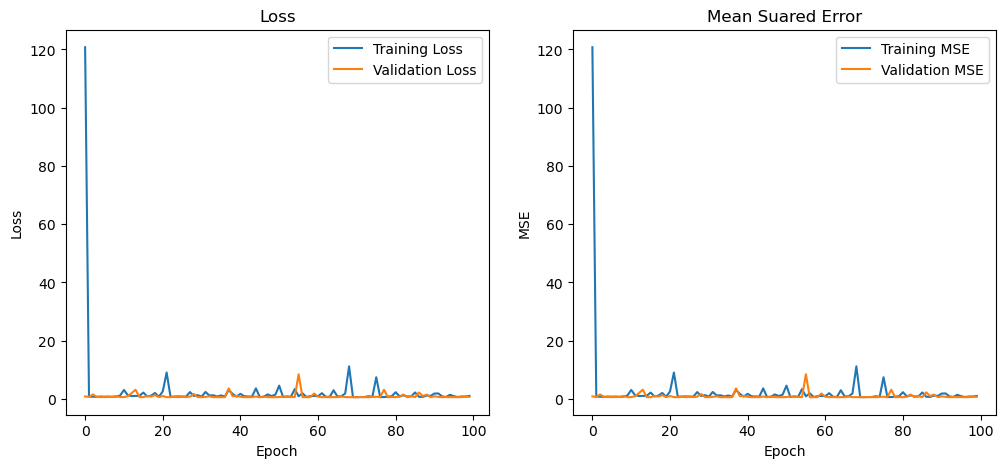

In [135]:
# Plot training vs validation loss
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1) #Side by side
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot MSE
plt.subplot(1, 2, 2)
plt.plot(history.history["mse"], label="Training MSE")
plt.plot(history.history["val_mse"], label="Validation MSE")
plt.title("Mean Suared Error")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.legend()

plt.show()

### Part 6

Create a second, deeper network with the following architecture:

- First hidden layer: 64 nodes with ReLU activation
- Second hidden layer: 128 nodes with ReLU activation
- Third hidden layer: 64 nodes with ReLU activation
- Output layer: [appropriate nodes for your classification task]

In [137]:
# Create a second, deeper network with the following architecture:
model2 = Sequential([
    Input(shape=(5,)),
    Dense(64, activation="relu"), 
    Dense(128, activation="relu"),
    Dense(64, activation="relu"),
    Dense(1)  # Output layer
])

# Compile the model
model2.compile(optimizer="adam", loss="mse", metrics=["mse"])

### Part 7

Add a `BatchNormalization` layer before the first dense layer and retrain the model with the same parameters as before.

In [139]:
#  Create the model with BatchNormalization before the first dense layer only
batchnorm_model = Sequential([
    Input(shape=(5,)),
    BatchNormalization(),  # BatchNormalization before the first Dense layer
    Dense(64, activation="relu"), 
    Dense(128, activation="relu"),
    Dense(64, activation="relu"), 
    Dense(1)  # Output layer 
])

# Compile the model
batchnorm_model.compile(optimizer="adam", loss="mse", metrics=["mse"])

##### Does this change anything?

In [141]:
# fit model2 (without BatchNormalization)
# Train the model 
history_model2 = model2.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

In [142]:
# fit model with BatchNormalization)
# Train the model 
history_batchnorm = batchnorm_model.fit(X_train, y_train, epochs=50, validation_split=0.2, verbose=0)

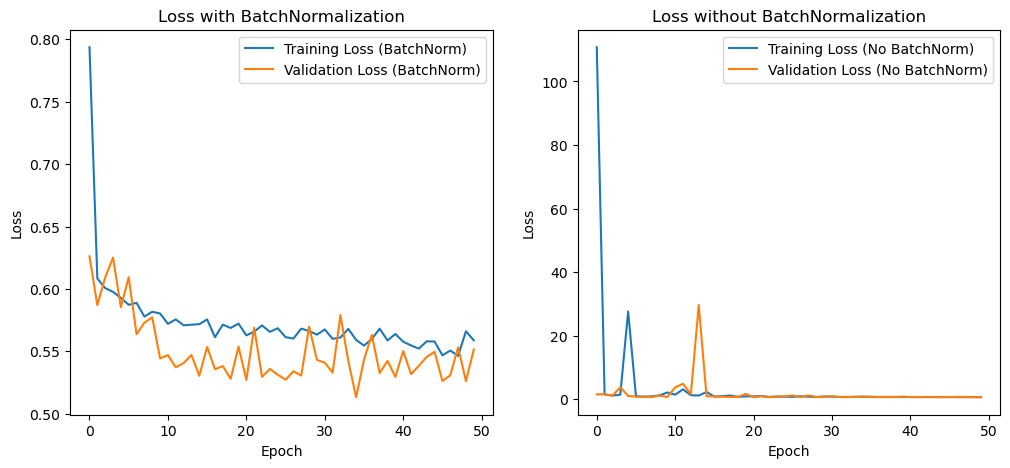

In [143]:
# Compare changes 

# Plot training vs validation loss
plt.figure(figsize=(12, 5))

# Plot for Model with BatchNormalization
plt.subplot(1, 2, 1)
plt.plot(history_batchnorm.history["loss"], label="Training Loss (BatchNorm)")
plt.plot(history_batchnorm.history["val_loss"], label="Validation Loss (BatchNorm)")
plt.title("Loss with BatchNormalization")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Plot for Model without BatchNormalization
plt.subplot(1, 2, 2)
plt.plot(history_model2.history["loss"], label="Training Loss (No BatchNorm)")
plt.plot(history_model2.history["val_loss"], label="Validation Loss (No BatchNorm)")
plt.title("Loss without BatchNormalization")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()

In [144]:
# With Batch Normalization: Stable convergence, smooth training and validation loss, better generalization, and no overfitting.
# Without Batch Normalization: Unstable training, erratic validation loss, risk of overfitting, and poor generalization.

### Part 8

**Early Stopping**  

Do we need 100 epochs to effectively train the data?  

- Iterate to now include an `EarlyStopping` callback in your model above.  
- Set the `patience` equal to 5.  


In [146]:
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback
early_stopping = EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)
# apply monitor="val_loss" the validation loss to determine if it should stop training

# Train the model with EarlyStopping
history_early = batchnorm_model.fit(
    X_train, y_train,
    epochs=100,
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping])

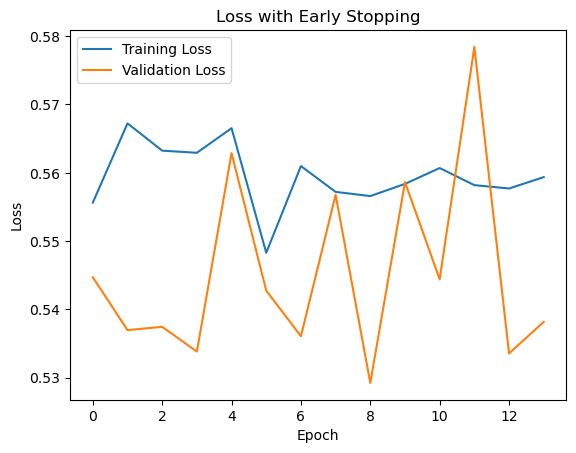

In [147]:
# Plot
plt.plot(history_early.history["loss"], label="Training Loss")
plt.plot(history_early.history["val_loss"], label="Validation Loss")
plt.title("Loss with Early Stopping")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show ()

**How many epochs do you think are appropriate?**

In [149]:
# No need to have 100 epochs to train data effectivly. 
# When apply the early stopping it will stop training when the model's performance stops improving.

# In this case epochs 12 as the early stop suggesting

### Part 9

**Dropout**  

- Add dropout layers to the model:
   - 5% dropout after the second layer
   - 20% dropout after the third layer
   - Train the model to compare **performance and convergence time**

In [151]:
import time

In [152]:
# Model with Dropout and Early Stopping
dropout_model = Sequential([
    Input(shape=(5,)),
    Dense(64, activation="relu"),
    Dense(128, activation="relu"),
    Dropout(0.05),  # 5% dropout
    Dense(64, activation="relu"),
    Dropout(0.2),  # 20% dropout
    Dense(1)  # Output layer
])

# Compile the model
dropout_model.compile(optimizer="adam", loss="mse", metrics=["mse"])

# Check time 
start_time_drop_early = time.time()

# Train the model
history_dropout = dropout_model.fit(
    X_train, y_train,
    epochs=100,
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping])

# Time taken for training
end_time_drop_early = time.time()
total_time_drop_early= end_time_drop_early - start_time_drop_early
print(f'Training time for Dropout and Early stopping: {total_time_drop_early:.2f} seconds')

# See performance
print(f'Training loss with Drop and Early stopping: {history_dropout.history["loss"][-1]:.2f}')
print(f'Validation loss with Drop and Early stopping: {history_dropout.history["val_loss"][-1]:.2f}')

Training time for Dropout and Early stopping: 2.18 seconds
Training loss with Drop and Early stopping: 1.98
Validation loss with Drop and Early stopping: 1.15


In [153]:
# The combination of dropout and early stopping lead to a model that performs well on both training and validation, 
# with the validation performance being slightly better, indicating good generalization.

### Part 9 - continued: RMSE vs. Baseline

Calculate and compare the RMSE of both the baseline model and your optimized model.

In [155]:
# Import Lib
from sklearn.metrics import mean_squared_error

# Baseline model predictions
baseline_preds = model.predict(X_test)
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_preds))

# Optimized model predictions
optimized_preds = dropout_model.predict(X_test)
optimized_rmse = np.sqrt(mean_squared_error(y_test, optimized_preds))

print(f'Baseline RMSE: {baseline_rmse:.2f}')
print(f'Optimized RMSE: {optimized_rmse:.2f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 267us/step
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 308us/step
Baseline RMSE: 0.85
Optimized RMSE: 1.79


### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  

- Create a model with the same architecture and dropout layers
- Add l2 regularization (0.01) to **each** dense layer
- Calculate the RMSE and compare it against the baseline model

In [157]:
# Import lib for regularizers
from tensorflow.keras import regularizers 

# Define the model with L2 regularization and dropout layers
regularized_model = Sequential([
    Input(shape=(5,)),
    Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization 
    Dense(128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization 
    Dropout(0.05),  # 5% dropout after the second layer
    Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01)),  # L2 regularization 
    Dropout(0.2),  # 20% dropout after the third layer
    Dense(1)  # Output layer
])

# Compile the model
regularized_model.compile(optimizer="adam", loss="mse", metrics=["mse"])

# Train the model with early stopping
history_regularized = regularized_model.fit(
    X_train, y_train,
    epochs=100,
    verbose=0,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping]
)

# Predict using the regularized model
regularized_preds = regularized_model.predict(X_test)

# Calculate RMSE for the regularized model
regularized_rmse = np.sqrt(mean_squared_error(y_test, regularized_preds))

print(f'Regularized model RMSE: {regularized_rmse:.2f}')
print(f'Baseline RMSE: {baseline_rmse:.2f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 315us/step
Regularized model RMSE: 1.57
Baseline RMSE: 0.85


### Part 11: Saving the Model

Save your best model in HDF5 format using `model.save(cali_housing.h5)`

In [163]:
from tensorflow.keras.models import save_model
regularized_model.save("cali_housing.h5")